# Data mining project - ysolanky


## Implementation of ANN using Keras

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import numpy as np

In [3]:
df = pd.read_csv("dataset.csv")

C:\Users\yashp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [5]:
df = df[df["Consumer complaint narrative"].notnull()]
#Removing the null rows

In [6]:
df = df[["Issue","Consumer complaint narrative"]]

In [2]:
# Removing everthing besides the X and Y from the dataset

In [7]:
df

,Issue,Consumer complaint narrative
29904,Incorrect information on your report,The Summer of XX/XX/2018 I was denied a mortga...
30629,Incorrect information on your report,There are many mistakes appear in my report wi...
30735,Incorrect information on your report,There are many mistakes appear in my report wi...
30795,Incorrect information on your report,There are many mistakes appear in my report wi...
30807,Incorrect information on your report,There are many mistakes appear in my report wi...
...,...,...
912543,Other,Mel S. Harris & assoc. used deceptive collecti...
912546,Disclosure verification of debt,Portfolio Recovery has been reporting a collec...
912550,Charged fees or interest I didn't expect,I KEEP RECEIVING PHONE CALLS FRON NORTHEAST RE...
912552,Incorrect information on credit report,account reported as discharged through bankrup...


In [8]:
df = df.reset_index(drop=True)

In [3]:
# These fucntions perform pre processing on the Consumer complaint narrative column

def remove_non_string(x):
    t1=re.sub('[^A-Za-z\s]+', '',x)
    t2=re.sub('x{2,20}', '',t1)
    return (t2)

def rem_stop(x):
    to_remove = stopwords.words("english")
    y = ' '.join([sw for sw in x.split() if sw not in to_remove])
    return(y)

# def pre_process(dataframe):
#     for_analysis_t1=dataframe.copy()
#     for_analysis_t2=for_analysis_t1.loc[for_analysis_t1['commentBody'].notnull()].copy()
#     for_analysis_t2['commentBody']=for_analysis_t2['commentBody'].str.lower()
#     for_analysis_t2['commentBody_']=for_analysis_t2['commentBody'].apply(remove_non_string)
#     for_analysis_t2['commentBody_']=for_analysis_t2['commentBody_'].apply(rem_stop)
#     dataframe["commentBody_"] = for_analysis_t2['commentBody_']
#     dataframe.drop(["commentBody"],axis = 1,inplace = True)
#     dataframe.rename(columns = {"commentBody_":"commentBody"},inplace = True)
    
def pre_process(dataframe):
    #dataframe = dataframe.loc[dataframe['commentBody'].notnull()]
    dataframe['Consumer complaint narrative']= dataframe['Consumer complaint narrative'].str.lower()
    dataframe['Consumer complaint narrative']= dataframe['Consumer complaint narrative'].apply(remove_non_string)
    dataframe['Consumer complaint narrative']= dataframe['Consumer complaint narrative'].apply(rem_stop)

In [10]:
df.tail()

,Issue,Consumer complaint narrative
383559,Other,Mel S. Harris & assoc. used deceptive collecti...
383560,Disclosure verification of debt,Portfolio Recovery has been reporting a collec...
383561,Charged fees or interest I didn't expect,I KEEP RECEIVING PHONE CALLS FRON NORTHEAST RE...
383562,Incorrect information on credit report,account reported as discharged through bankrup...
383563,"Loan servicing, payments, escrow account",I currently have a mortgage with Flag star ban...


In [11]:
df["Issue"].value_counts()

Incorrect information on your report                                                48773
Problem with a credit reporting company's investigation into an existing problem    24727
Incorrect information on credit report                                              21217
Attempts to collect debt not owed                                                   19845
Cont'd attempts collect debt not owed                                               17435
                                                                                    ...  
Lender sold the property                                                                3
Lender damaged or destroyed vehicle                                                     2
Property was damaged or destroyed property                                              2
Lender damaged or destroyed property                                                    1
Problem with an overdraft                                                               1
Name: Issu

In [12]:
df.describe

<bound method NDFrame.describe of                                            Issue  \
0           Incorrect information on your report   
1           Incorrect information on your report   
2           Incorrect information on your report   
3           Incorrect information on your report   
4           Incorrect information on your report   
...                                          ...   
383559                                     Other   
383560           Disclosure verification of debt   
383561  Charged fees or interest I didn't expect   
383562    Incorrect information on credit report   
383563  Loan servicing, payments, escrow account   

                             Consumer complaint narrative  
0       The Summer of XX/XX/2018 I was denied a mortga...  
1       There are many mistakes appear in my report wi...  
2       There are many mistakes appear in my report wi...  
3       There are many mistakes appear in my report wi...  
4       There are many mistakes appear in

In [13]:
a = df.groupby(["Issue"])
len(a)
a.describe()

Consumer complaint narrative  \
                                                                          count   
Issue                                                                             
APR or interest rate                                                        785   
Account opening, closing, or management                                    6347   
Account terms and changes                                                    17   
Adding money                                                                 92   
Advertising                                                                  47   
...                                                                         ...   
Vehicle was repossessed or sold the vehicle                                  72   
Was approved for a loan, but didn't receive money                             8   
Was approved for a loan, but didn't receive the...                           48   
Written notification about debt                                            8976   
Wrong amount charged or received                                            210   

                                                           \
                                                   unique   
Issue                                                       
APR or interest rate                                  785   
Account opening, closing, or management              6331   
Account terms and changes                              17   
Adding money                                           92   
Advertising                                            47   
...                                                   ...   
Vehicle was repossessed or sold the vehicle            72   
Was approved for a loan, but didn't receive money       8   
Was approved for a loan, but didn't receive the...     48   
Written notification about debt                      8546   
Wrong amount charged or received                      210   

                                                                                                       \
                                                                                                  top   
Issue                                                                                                   
APR or interest rate                                Recently, American express increased ( XXXX ) ...   
Account opening, closing, or management             On at least XXXX previous occasions, I request...   
Account terms and changes                           CNAC car creditor keeps updating status on my ...   
Adding money                                        I loaded XXXX dollars to my prepaid rush card ...   
Advertising                                         Dear Expert Researchers in these kinds of case...   
...                                                                                               ...   
Vehicle was repossessed or sold the vehicle         Last month I spoke to a representative from th...   
Was approved for a loan, but didn't receive money   Will first of all I tryed getting a loans but ...   
Was approved for a loan, but didn't receive the...  XXXX   XXXX    some guy  XXXX   call  ask for ...   
Written notification about debt                     Capital One has violated 15 USC 1692 by contin...   
Wrong amount charged or received                    Paypal does not disclose that it charges fees ...   

                                                         
                                                   freq  
Issue                                                    
APR or interest rate                                  1  
Account opening, closing, or management               4  
Account terms and changes                             1  
Adding money                                          1  
Advertising                                           1  
...                                                 ...  
Vehicle was repossessed or sold the vehi

In [14]:
df = a.filter(lambda x: len(x) > 10000)

In [4]:
# As 161 is a lot of issues with most of them barely having any data, we opted to remove Issues with less tahn 10,000 occurences

In [15]:
df["Issue"].unique()

array(['Incorrect information on your report',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Attempts to collect debt not owed', 'Improper use of your report',
       'Communication tactics', 'Incorrect information on credit report',
       'Loan servicing, payments, escrow account',
       'Loan modification,collection,foreclosure',
       "Cont'd attempts collect debt not owed"], dtype=object)

In [16]:
pre_process(df)

In [17]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# We split the entire dataset into training, testing and validation

In [18]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(df,test_size=test_split,stratify=df["Issue"].values)


# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 165914
Number of rows in validation set: 9218
Number of rows in test set: 9217


C:\Users\yashp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
train_df

,Issue,Consumer complaint narrative
261169,Cont'd attempts collect debt not owed,synchrony collector ge capital harassing via h...
301378,Communication tactics,portfolio recovery associates knowingly report...
117759,Incorrect information on your report,reporting authorized user account acccount bel...
117694,Incorrect information on your report,purchased new fraudulent sales tactics messed ...
123345,Problem with a credit reporting company's inve...,credit reporting outlet get information credit...
...,...,...
122464,Communication tactics,calling workplace everyday days week months ph...
178959,Incorrect information on your report,years ago mother contacted chase bank ask auth...
345068,"Loan modification,collection,foreclosure",hereby dispute reply suntrust complaint way cf...
231988,"Loan modification,collection,foreclosure",complaint related previous complaint submitted...


In [20]:
terms = tf.ragged.constant(train_df["Issue"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'Incorrect information on your report', "Problem with a credit reporting company's investigation into an existing problem", 'Incorrect information on credit report', 'Attempts to collect debt not owed', "Cont'd attempts collect debt not owed", 'Improper use of your report', 'Loan servicing, payments, escrow account', 'Communication tactics', 'Loan modification,collection,foreclosure']


In [6]:
# We one hot encode the Issues

In [21]:
sample_label = train_df["Issue"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: Cont'd attempts collect debt not owed
Label-binarized representation: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
train_df['Consumer complaint narrative'].apply(lambda x: len(x.split(" "))).describe()

count    165914.000000
mean         71.551822
std          77.657214
min           1.000000
25%          25.000000
50%          48.000000
75%          90.000000
max        2649.000000
Name: Consumer complaint narrative, dtype: float64

In [7]:
# The average length of a consumer complaint is 71, so we use 75 as the max length for an Issue

In [23]:
for i,j in train_df["Issue"].items():
    train_df["Issue"][i] = [train_df["Issue"][i]]
for i,j in val_df["Issue"].items():
    val_df["Issue"][i] = [val_df["Issue"][i]]
for i,j in test_df["Issue"].items():
    test_df["Issue"][i] = [test_df["Issue"][i]]

C:\Users\yashp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
max_seqlen = 75
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def unify_text_length(text, label):
    # Split the given abstract and calculate its length.
    word_splits = tf.strings.split(text, sep=" ")
    sequence_length = tf.shape(word_splits)[0]

    # Calculate the padding amount.
    padding_amount = max_seqlen - sequence_length

    # Check if we need to pad or truncate.
    if padding_amount > 0:
        unified_text = tf.pad([text], [[0, padding_amount]], constant_values="<pad>")
        unified_text = tf.strings.reduce_join(unified_text, separator="")
    else:
        unified_text = tf.strings.reduce_join(word_splits[:max_seqlen], separator=" ")

    # The expansion is needed for subsequent vectorization.
    return tf.expand_dims(unified_text, -1), label


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["Issue"].values)
    #print(labels)
    #print(dataframe["topic_category_crude"].values)
    label_binarized = lookup(labels).numpy()
    #print(label_binarized)
    #print(len(label_binarized))
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Consumer complaint narrative"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    dataset = dataset.map(unify_text_length, num_parallel_calls=auto).cache()
    return dataset.batch(batch_size)

In [25]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [26]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text[0]}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'made several attempts let equifax consumer reporting bureau know items credit repot mine yet continue report inaccurate items report ie addresses accounts<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'
Label(s): ["Problem with a credit reporting company's investigation into an existing problem"]
 
Abstract: b'discharged alleged debt maryland state comptroller sending several negotiable instruments according ucc debt says tender payment obligation pay instrument made person entitled enforce instrument tender refused discharge pmy letters asking pertinent information would answer according fair credit reporting act section usc gj also asked original contract original signature along buying debt pennies dollar maryland state comptroller alleged debt bought becam

In [27]:
train_df["total_words"] = train_df["Consumer complaint narrative"].str.split().str.len()
vocabulary_size = train_df["total_words"].max()
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 2649


<ipython-input-27-5bdfbbb078a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["total_words"] = train_df["Consumer complaint narrative"].str.split().str.len()


In [28]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf")

with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

In [9]:
# Using tf_idf we get to know the frequency of a word in the dataset

In [71]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dropout(.5),
            layers.Dense(256, activation="relu"),
            layers.Dropout(.5),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]
    )
    return shallow_mlp_model

In [8]:
# This is the structure of our final model

Epoch 1/20
1297/1297 [==============================] - 29s 22ms/step - loss: 0.2328 - categorical_accuracy: 0.5086 - val_loss: 0.1705 - val_categorical_accuracy: 0.6039
Epoch 2/20
1297/1297 [==============================] - 27s 21ms/step - loss: 0.1754 - categorical_accuracy: 0.5987 - val_loss: 0.1615 - val_categorical_accuracy: 0.6235
Epoch 3/20
1297/1297 [==============================] - 26s 20ms/step - loss: 0.1624 - categorical_accuracy: 0.6312 - val_loss: 0.1557 - val_categorical_accuracy: 0.6379
Epoch 4/20
1297/1297 [==============================] - 25s 19ms/step - loss: 0.1506 - categorical_accuracy: 0.6628 - val_loss: 0.1516 - val_categorical_accuracy: 0.6520
Epoch 5/20
1297/1297 [==============================] - 25s 19ms/step - loss: 0.1398 - categorical_accuracy: 0.6937 - val_loss: 0.1492 - val_categorical_accuracy: 0.6629
Epoch 6/20
1297/1297 [==============================] - 25s 19ms/step - loss: 0.1303 - categorical_accuracy: 0.7188 - val_loss: 0.1452 - val_categoric

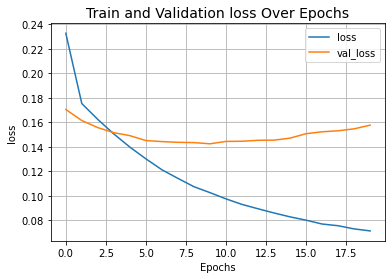

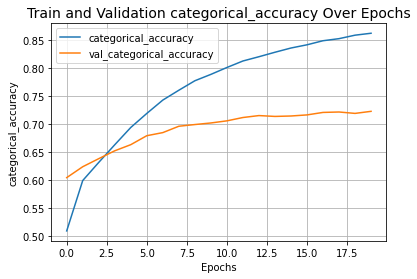

In [72]:
epochs = 20

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    #plt.savefig('nn.png')
    #plt.show()
    
                

plot_result("loss")
plt.savefig('nn.png')
plt.show()
plot_result("categorical_accuracy")
plt.savefig('nn1.png')
plt.show()

In [74]:
_, categorical_acc = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical accuracy on the test set: {round(categorical_acc * 100, 2)}%.")

73/73 [==============================] - 1s 11ms/step - loss: 0.1665 - categorical_accuracy: 0.7089
Categorical accuracy on the test set: 70.89%.


In [75]:
shallow_mlp_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 512)               1356800   
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_54 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,490,698
Trainable params: 1,490,698
Non-trainable params: 0
_________________________________________________________________


In [52]:
# referenced from https://keras.io/examples/nlp/multi_label_classification/